In [ ]:
!pip install tensorflow==1.15.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q lucid>=0.2.3
!pip install -q moviepy

In [ ]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 28.9 MB/s 
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303885 sha256=12e66ac68f50fe1997a51a606afebc7e51eab29fcfa03f7c6cd0271e98803b4f
  Stored in directory: /root/.cache/pip/wheels/46/20/07/7bb9c8c44e6ec2efa60fd0e6280094f53f65f41767ef69a5ee
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.9.0
    Uninstalling imageio-2.9.0:
      Successfully uninstalled imageio-2.9.0


In [ ]:
import numpy as np
import json
import moviepy.editor as mvp
from google.colab import files
import tensorflow.compat.v1.gfile as gfile
import lucid.misc.io.showing as show
import random as rd

In [ ]:
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


In [ ]:
def addPixel(a,b):
  gl.glVertex2f(a/(WIDTH/2),b/(HEIGHT/2))

In [ ]:
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)


gl.glPointSize(5)




gl.glColor3f(0,.5,0)
gl.glBegin(gl.GL_POINTS)
for i in range(50):
  x=rd.randint(-401,400)
  y=rd.randint(-301,300)
  addPixel(x,y)

#gl.glVertex2f(.75,.80 )
#gl.glVertex2f(.1, 0)

gl.glEnd()





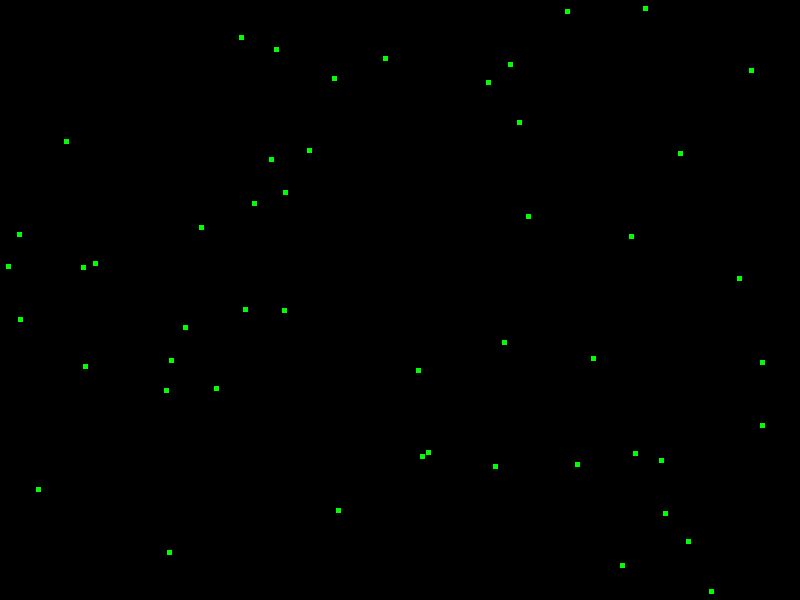

In [ ]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)

In [ ]:
from OpenGL.raw.GL.VERSION.GL_1_0 import GL_POINT_SMOOTH
# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)


gl.glPointSize(5)

# For turning the background white
gl.glBegin(gl.GL_QUADS)
gl.glColor3f(1,1,1)
addPixel(400,300)
addPixel(400,-300)
addPixel(-400,-300)
addPixel(-400,300)
gl.glEnd()



gl.glColor3f(0,0,0)
gl.glBegin(gl.GL_LINES)
#sides
addPixel(300,50)
addPixel(300,-300)
addPixel(-300,50)
addPixel(-300,-300)
#roof
addPixel(-350,50)
addPixel(350,50)
addPixel(0,250)
addPixel(350,50)
addPixel(0,250)
addPixel(-350,50)
#door
addPixel(50,-150)
addPixel(50,-300)
addPixel(-50,-150)
addPixel(-50,-300)
addPixel(50,-150)
addPixel(-50,-150)
#window1
addPixel(100,-100)
addPixel(250,-100)
addPixel(100,-100)
addPixel(100,0)
addPixel(100,0)
addPixel(250,0)
addPixel(250,-100)
addPixel(250,0)
#window2
addPixel(-100,-100)
addPixel(-250,-100)
addPixel(-100,-100)
addPixel(-100,0)
addPixel(-100,0)
addPixel(-250,0)
addPixel(-250,-100)
addPixel(-250,0)
gl.glEnd()
#doorknob
gl.glEnable(GL_POINT_SMOOTH)
gl.glPointSize(7)
gl.glBegin(gl.GL_POINTS)
addPixel(40,-230)
gl.glEnd()






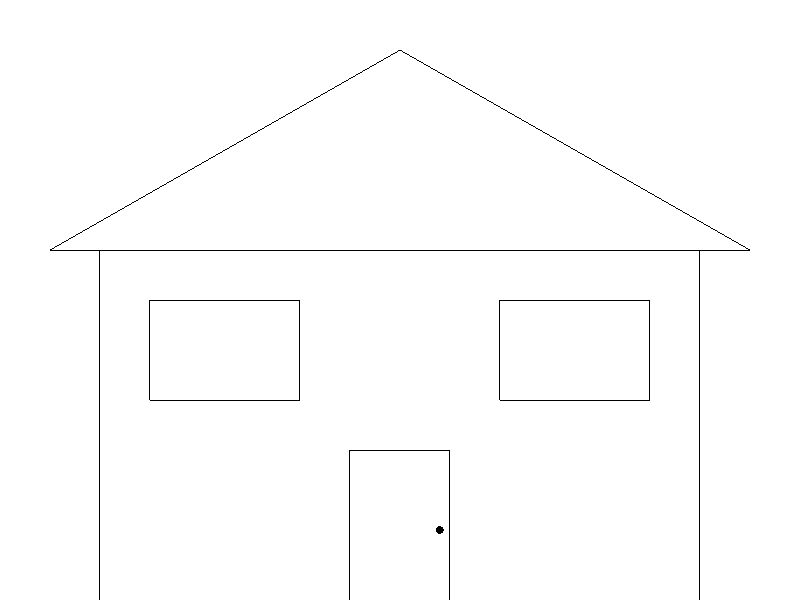

In [ ]:
img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf, np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
show.image(img/255.0)